In [15]:
import json
import numpy as np
from matplotlib import pyplot as plt

### 加载数据

In [3]:
data = json.load(open("./data/CQU-BPMDD-anotations.json", "r", encoding="utf-8"))

### 统计图片尺寸

In [11]:
for record in data:
    for annotation in record["annotations"]:
        for res in annotation["result"]:
            if res["original_width"] != 3692 and res["original_height"] != 2147:
                print(res["original_width"], res["original_height"])
                break

### 统计数据分布情况

In [47]:
from collections import Counter

counter = Counter()

for record in data:
    for annotation in record["annotations"]:
        for res in annotation["result"]:
            for label in res["value"]["rectanglelabels"]:
                counter[label] += 1

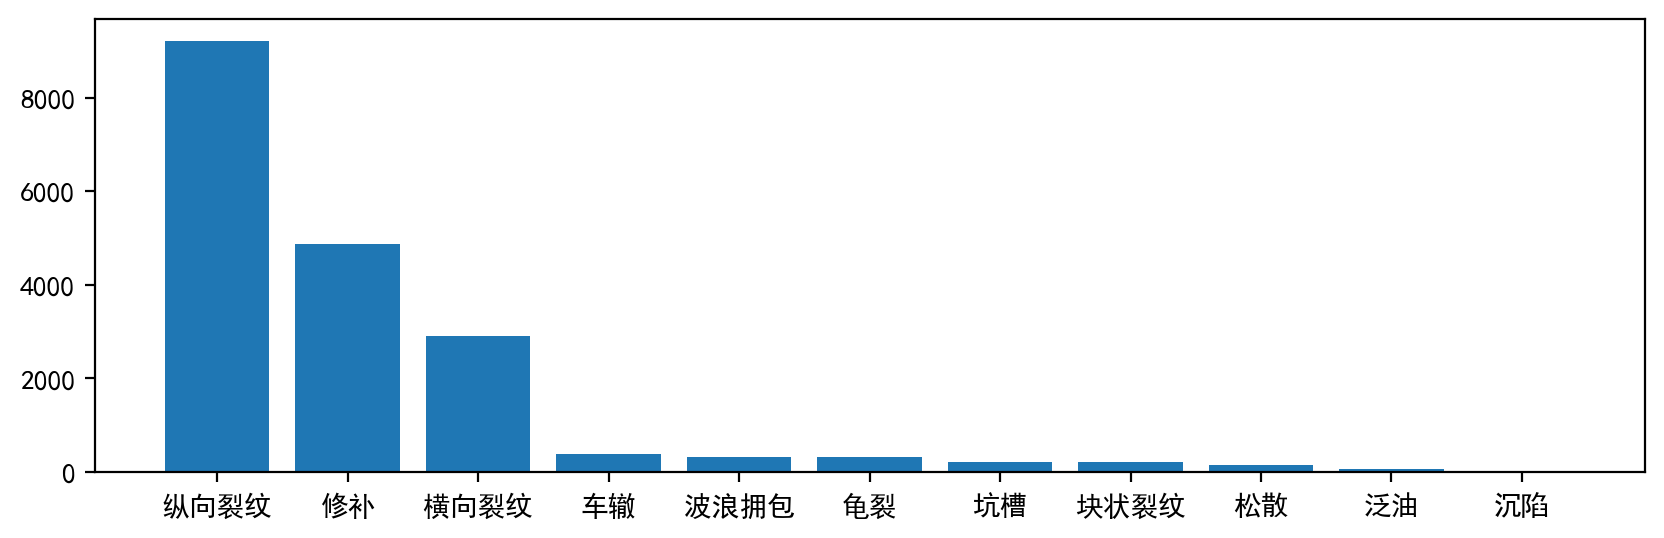

In [48]:
stat = sorted(counter.items(), key=lambda x : -x[1])
plt.rcParams["font.sans-serif"] = "SimHei"
fig = plt.figure(figsize=(10, 3), dpi=200)
plt.bar([x[0].split("(")[1][:-1] for x in stat], [x[1] for x in stat])
plt.show()